# Análisis exploratorio de los datos y visualización efectiva

El conjunto de datos es originalmente del National Institute of Diabetes and Digestive and Kidney Diseases.
El objetivo del conjunto de datos es predecir diagnósticamente si un paciente tiene diabetes, basado en ciertas medidas de diagnóstico.
Se colocaron varias restricciones en la selección de estas instancias de una base de datos más grande.
En particular, en este dataset todos los pacientes son mujeres de al menos 21 años de edad de ascendencia indígena Pima.


| Columnas                 | Descripción                                      |
| ------------------------ | ------------------------------------------------ |
| Pregnancies              | To express the Number of pregnancies             |
| Glucose                  | To express the Glucose level in blood            |
| BloodPressure            | To express the Blood pressure measurement        |
| SkinThickness            | To express the thickness of the skin             |
| Insulin                  | To express the Insulin level in blood            |
| BMI                      | To express the Body mass index                   |
| DiabetesPedigreeFunction | To express the Diabetes percentage               |
| Age                      | To express the age                               |
| Outcome                  | To express the final result 1 is Yes and 0 is No |


## Exploración y preparación de los datos

Se importan los paquete a usar:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import os

Se crea una carpeta para guadar las figuras que se creen:

In [7]:
fig_path = "notebooks/fig"

# Chequeo se existe, sino existe lo creo:
if not os.path.isdir(fig_path):
    os.mkdir(fig_path)

Se lee el dataset usando la libreria de `pandas`:

In [3]:
original_df = pd.read_csv("../data/diabetes.csv")

original_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Se inspecciona el dataset usando la librería de `pandas` y se chequea la exitencia de filas duplicadas y la presencia de nans:

In [5]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Chequelo los nans
original_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Chequeo las filas duplicadas
original_df.duplicated().sum()

0

Ahora, se realizó una inspección más estadística del dataset:

In [8]:
original_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Se observa que las columnas de  _Glucose, BloodPressure, SkinThickness, Insulin y BMI_ tienen un valor mínimo igual a 0.

Se cuentan cuantas filas en cada una de éstas columnas hay valores igual a 0:

In [9]:
# Defino las columnas a inspeccionar
columns_key = original_df.columns.values[1:-3] 

# Imprimo el numero de valores igual a 0 que hay en cada columna
# y su porcentaje correspondiente en el total de los datos
for col in columns_key:
    count_0 = len(original_df[original_df[col] == 0])
    print(f"{col} : {count_0} ({count_0 * 100 // original_df.shape[0]} %)")

Glucose : 5 (0 %)
BloodPressure : 35 (4 %)
SkinThickness : 227 (29 %)
Insulin : 374 (48 %)
BMI : 11 (1 %)


Además, se grafica la distribución de la columna _Outcome_:

<AxesSubplot: xlabel='Outcome', ylabel='count'>

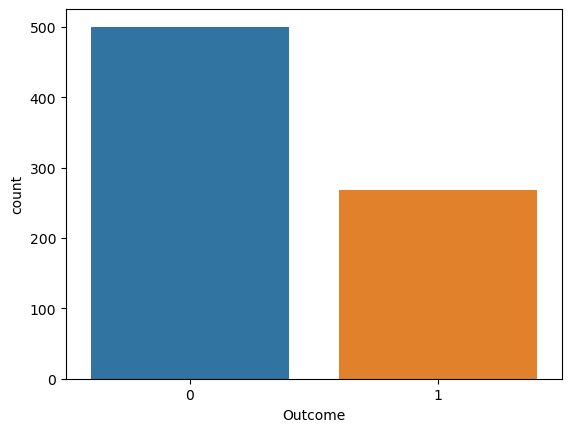

In [10]:
sns.countplot(data=original_df , x='Outcome')

In [9]:
print(
    f"Diabetes negativo: {100 * original_df.Outcome.value_counts()[0] // len(original_df.Outcome)} %",
    "\n"
    f"Diabetes positivo: {100 * original_df.Outcome.value_counts()[1] // len(original_df.Outcome)} %",
)

Diabetes negativo: 65 % 
Diabetes positivo: 34 %


**Observaciones encontradas hasta el momento:**

- El dataset tiene 768 datos con 9 columnas y ningún valor faltante o duplicado.

- La distribución de la columna _Outcome_ está desbalanceado. Esto deberá tenerse en cuenta para realizar el modelo que prediga la diabetes en los pacientes. 

- Algunas columnas tienen un valor mínimo iguales a 0, lo que es imposible para columnas como la Glucose, BloodPressure, SkinThickness, Insulin y BMI. La cantidad de valores igual a 0 en las columnas mencionada es muy significativo, especialmente en _BloodPressure, SkinThickness y Insulin_, por lo cual no sería conveniente eliminar esas filas de nuestro dataset. En cambio, para las columnas de _Glucose y BMI_, como los valores con valor cero solo representan el  1% de los datos, estas filas pueden ser eliminadas.

Para tomar la decisión de eliminar o rellenar los valores de las columnas que tienen valores iguales a 0, vamos a realizar una gráfica de la distribución de cada columna junto con un boxplot:

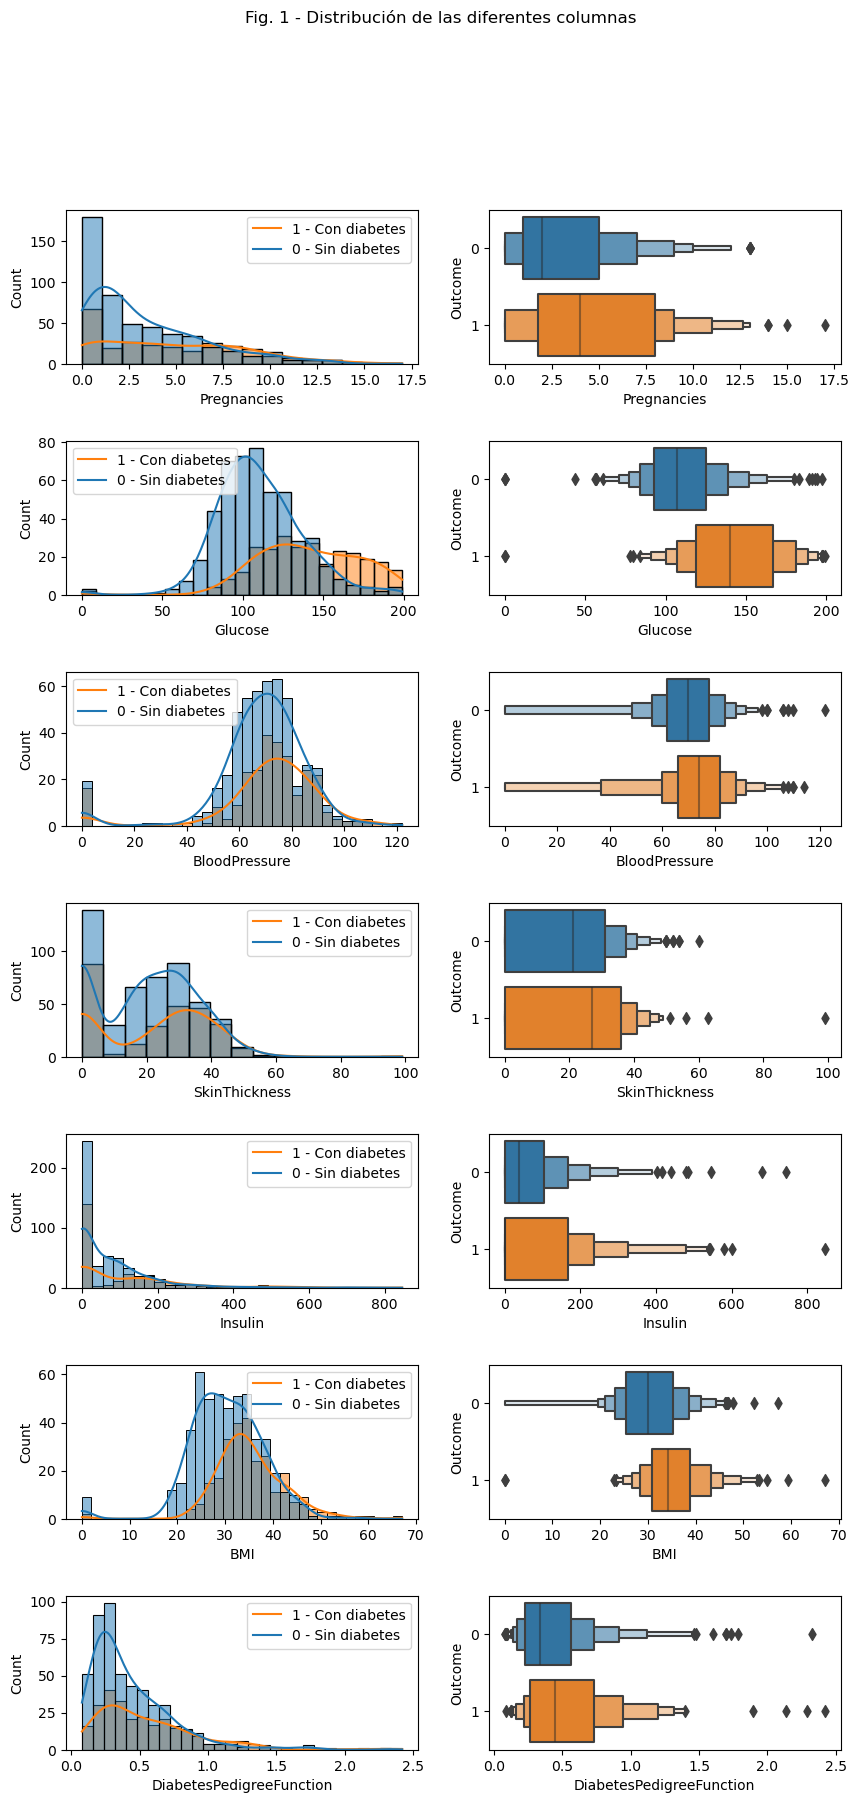

In [12]:
# Obtengo el nombre de las columnas
column_key = original_df.columns.values

fig , axs = plt.subplots(nrows=len(column_key[-1]), ncols=2, figsize=(10, 20))

fig.suptitle("Fig. 1 - Distribución de las diferentes columnas")

# Realizo la gráfica de la distribución y el boxplot para todas las columnas del dataset
for column, i in zip(column_key, range(len(column_key[-1]))): 
    sns.histplot(data=original_df, kde=True, x=column, hue='Outcome', ax=axs[i, 0])
    axs[i,0].legend(labels=['1 - Con diabetes', '0 - Sin diabetes'])

    sns.boxenplot(data=original_df, x=column, y='Outcome', orient='h', ax=axs[i, 1])

fig.subplots_adjust(hspace=0.5)
#plt.savefig(f"{fig_path}/fig1.png")    
plt.show()

Para las columnas de _Glucose y BMI_ se decidió eliminar las filas que tienen valores iguales a 0, porque no representan una gran perdida de datos para el dataset:

In [11]:
original_df.drop(original_df[original_df.BMI == 0].index, inplace=True)
original_df.drop(original_df[original_df.Glucose == 0].index, inplace=True)
original_df.drop(original_df[original_df.SkinThickness > 90].index, inplace=True)

In [12]:
# Corroboro la eliminación
original_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,751.0,3.853529,3.376761,0.000,1.000,3.000,6.000,17.00
Glucose,751.0,121.841545,30.498528,44.000,99.500,117.000,141.000,199.00
BloodPressure,751.0,69.704394,18.334462,0.000,64.000,72.000,80.000,122.00
SkinThickness,751.0,20.611185,15.682367,0.000,0.000,23.000,32.000,63.00
Insulin,751.0,81.456724,115.964203,0.000,0.000,40.000,130.000,846.00
BMI,751.0,32.451664,6.933059,18.200,27.500,32.300,36.600,67.10
DiabetesPedigreeFunction,751.0,0.472915,0.330307,0.078,0.244,0.376,0.628,2.42
Age,751.0,33.274301,11.670218,21.000,24.000,29.000,41.000,81.00
Outcome,751.0,0.350200,0.477350,0.000,0.000,0.000,1.000,1.00


Debido a que las columnas de _BloodPressure, SkinThickness y Insulin_  tienen casi una distribución normal, voy a remplazar los valores iguales a 0 de cada una de estas columnas con la siguiente fórmula:

$$ \mu + (2 . \sigma . np.random.random() - 0.5) $$

Donde para una dada columna, $\mu$ es el valor medio y $\sigma$ su desviación estándar.

Al usar esta fórmula y no reemplazar directamente con el valor medio o la mediana, evito que los datos se acumulen en alguno de estos dos valores.

In [13]:
# Remplazo los valores 0
for column in ["BloodPressure", "SkinThickness", "Insulin"]:
    # Calculo el valor medio
    mean = original_df[column].mean()
    # Calculo la desviación estándar
    std = original_df[column].std()
    # remplazo los valores
    for i in original_df[column].index:
        if original_df[column][i]==0:
             original_df[column][i]= mean + (2 * std * np.random.random() - 0.5)

original_df

/tmp/ipykernel_52964/3002830031.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_df[column][i]= mean + (2 * std * np.random.random() - 0.5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.000000,119.551524,33.6,0.627,50,1
1,1,85,66.0,29.000000,288.225858,26.6,0.351,31,0
2,8,183,64.0,20.939621,135.133308,23.3,0.672,32,1
3,1,89,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70.0,27.000000,295.121677,36.8,0.340,27,0
765,5,121,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60.0,43.152910,91.280287,30.1,0.349,47,1


In [14]:
# Corroboro la eliminacion
original_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,751.0,3.853529,3.376761,0.000,1.000000,3.000,6.000000,17.00
Glucose,751.0,121.841545,30.498528,44.000,99.500000,117.000,141.000000,199.00
BloodPressure,751.0,73.015769,12.706673,24.000,64.000000,72.000,80.000000,122.00
SkinThickness,751.0,31.076000,10.285288,7.000,23.776798,31.000,39.000000,63.00
Insulin,751.0,174.739845,99.316711,14.000,102.203090,160.000,229.354901,846.00
BMI,751.0,32.451664,6.933059,18.200,27.500000,32.300,36.600000,67.10
DiabetesPedigreeFunction,751.0,0.472915,0.330307,0.078,0.244000,0.376,0.628000,2.42
Age,751.0,33.274301,11.670218,21.000,24.000000,29.000,41.000000,81.00
Outcome,751.0,0.350200,0.477350,0.000,0.000000,0.000,1.000000,1.00


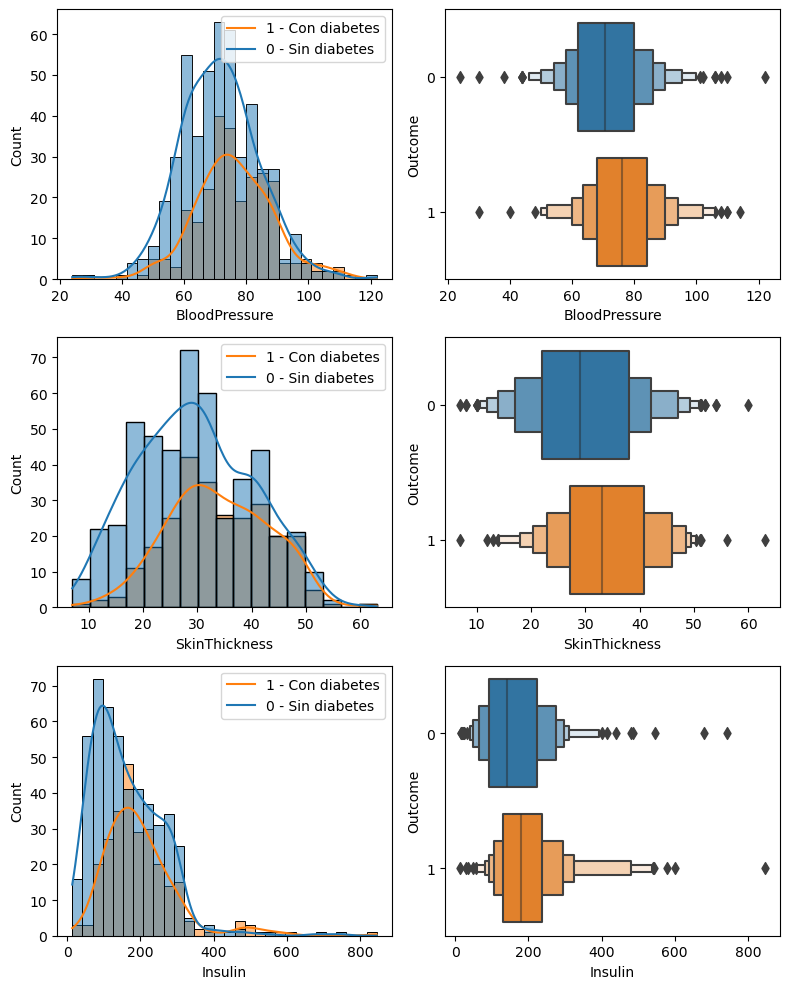

In [15]:
# grafico nuevamente la distribucion de estas 3 columnas
fig , axs = plt.subplots(nrows=3, ncols=2, figsize=(8,10))

for column, i in zip(["BloodPressure", "SkinThickness", "Insulin"], range(3)): 
    sns.histplot(data=original_df, kde=True, x=column, hue='Outcome', ax=axs[i, 0])
    axs[i,0].legend(labels=['1 - Con diabetes', '0 - Sin diabetes'])

    sns.boxenplot(data=original_df, x=column, y='Outcome', orient='h', ax=axs[i, 1])
    plt.tight_layout()

plt.show()

A continuación, se analiza la correlación entre los datos de las diferentes columnas del dataset:

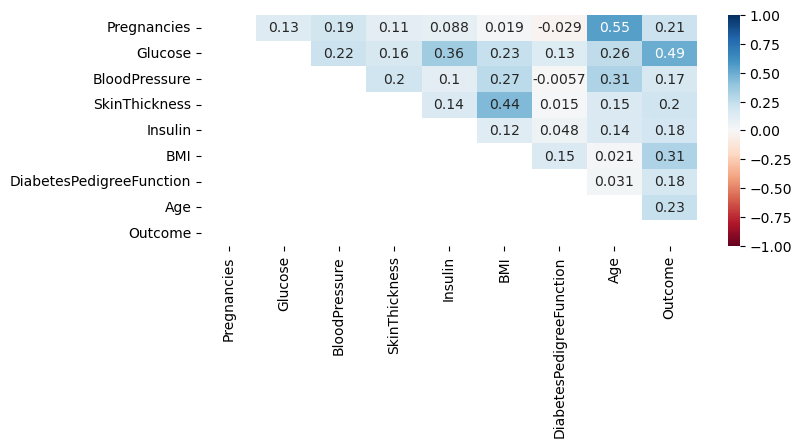

In [16]:
plt.figure(figsize=(8, 3))
sns.heatmap(
    original_df.corr(),  
    mask=np.tril(original_df.corr()), 
    vmin=-1,
    vmax=1,
    annot=True , 
    #fmt='.2f' , 
    cmap='RdBu' , 
#    linewidths=2
)
plt.show()

**Resumen de las correlaciones en el dataset:**

- No se aprecian grandes correlaciones entre las diferentes columnas.

- Las columnas con más correlación entre sí son _Pregnacies_ con _Age_, _Glucose_ con _Outcome_ y _SkinThickness_ con _BMI_.

- Las columnas con más correlación con la columna _Outcome_ son la columna de _Glucose_, seguida por _BMI_ y _Age_.

A continuacion se graficaron esta relaciones por dedio de scatter plots:

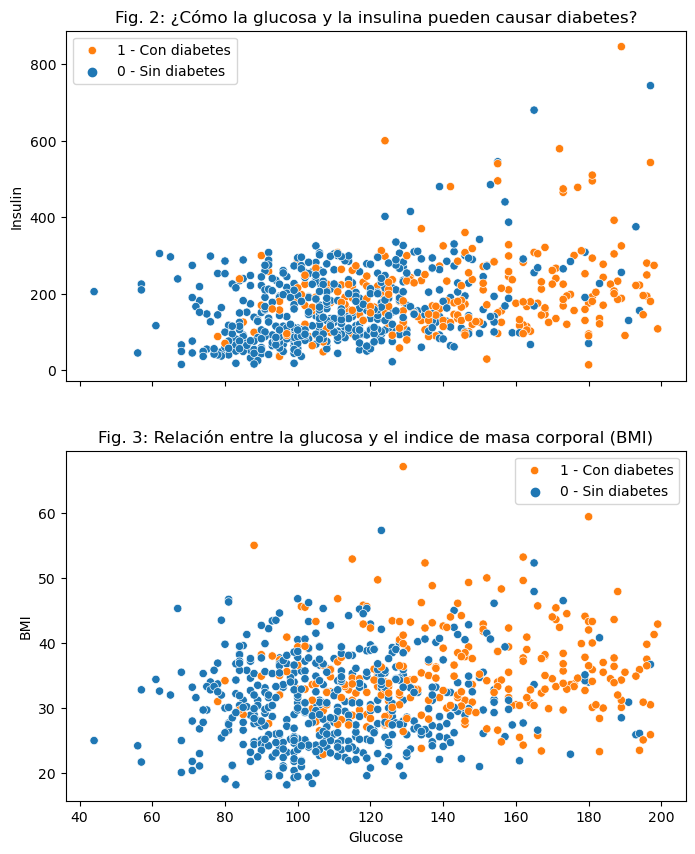

In [18]:
fig , axs = plt.subplots(nrows=2, ncols=1, figsize=(8,10), sharex=True)

# Grafico la relacion entre la insulina y la glucosa
sns.scatterplot(original_df, y="Insulin", x="Glucose", hue="Outcome", ax=axs[0])
axs[0].legend(labels=['1 - Con diabetes', '0 - Sin diabetes'])
axs[0].set_title("Fig. 2: ¿Cómo la glucosa y la insulina pueden causar diabetes?")

# Grafico la relacion entre el BMI y la glucosa
sns.scatterplot(original_df, y="BMI", x="Glucose", hue="Outcome", ax=axs[1])
axs[1].legend(labels=['1 - Con diabetes', '0 - Sin diabetes'])
axs[1].set_title("Fig. 3: Relación entre la glucosa y el indice de masa corporal (BMI)")

#plt.savefig(f"{fig_path}/fig2.png")

plt.show()

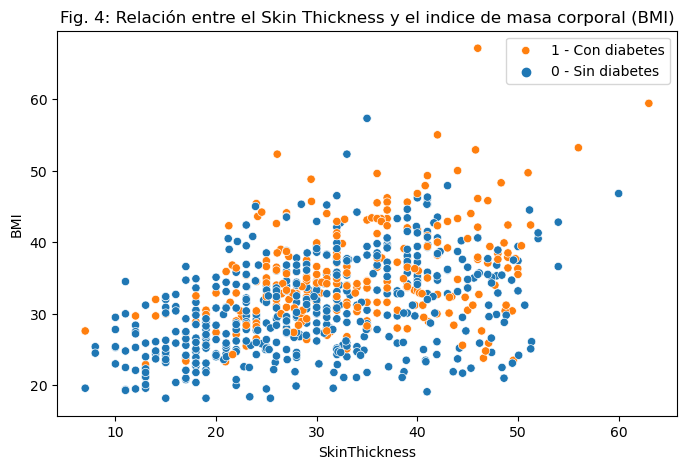

In [19]:
# Grafico la relacion entre el BMI y SkinThickness
fig , axs = plt.subplots(nrows=1, ncols=1, figsize=(8,5))

sns.scatterplot(original_df, y="BMI", x="SkinThickness", hue="Outcome", ax=axs)
axs.legend(labels=['1 - Con diabetes', '0 - Sin diabetes'])
axs.set_title("Fig. 4: Relación entre el Skin Thickness y el indice de masa corporal (BMI)")

# plt.savefig(f"{fig_path}/fig4.png")

plt.show()

**Observaciones de las graficas anteriores**

**Fig. 2**

* La figura muestra que los pacientes con niveles de glucosa menores a 80 no tienen posibilidad de tener diabetes. 
Mientras que los pacientes con valores entre 80 y 120 tienen menos probabilidades de ser diagnosticados con diabetes.
En estos 2 casos los niveles de Insulina eran relativamente bajos.

* Por otro lado,  los pacientes con niveles de glucosa por encima de 130 y altos niveles de insulina, han sido diagnosticados con diabetes.

**Fig. 3**

* La figura muestra que los pacientes con niveles de glucosa por debajo de 120 y con valores de BMI menores a 30 (peso saludable/normal) rara vez tienen diabetes. 

* Al parecer un paciente con un valor de BMI alto (> 30) y un nivel de glucosa alto (>130) sea diagnosticado con diabetes.

**Fig. 4**

* Pacientes con un BMI y un Skin Thickness menores a 3 tiene muy baja probabilidad de ser diagnosticados con diabetes. 


Grafico la fistibucin de las clases de la columna Outcome:

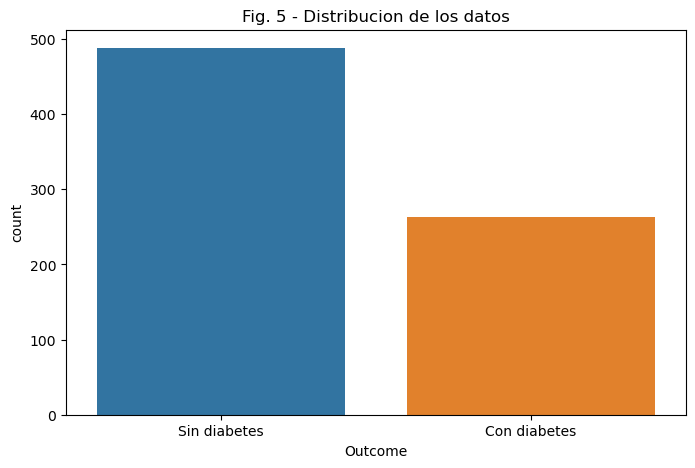

In [20]:
fig , axs = plt.subplots(figsize=(8,5))

sns.countplot(data=original_df , x='Outcome')
axs.set_xticklabels(["Sin diabetes", "Con diabetes"])
plt.title("Fig. 5 - Distribucion de los datos")

#plt.savefig(f"{fig_path}/fig5.png")

plt.show()

## Conclusiones de la visualización de datos

* Un nivel alto de glucosa (> 140) son un indicador de diabetes.

* Los pacientes con BMI alto tienen un mayor riesgo de contraer diabetes.

* El dataset tiene 2 clases las cuales están desbalanceadas y sera un tema al buscar el modelo para desarrollar el predictor.


Por último, guardo este dataset desbalanceado como `dataset_1`:

In [21]:
original_df.to_csv("data/dataset_1.csv", index=False)